In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

In [4]:
df = pd.read_csv('train_indessa.csv')

In [5]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

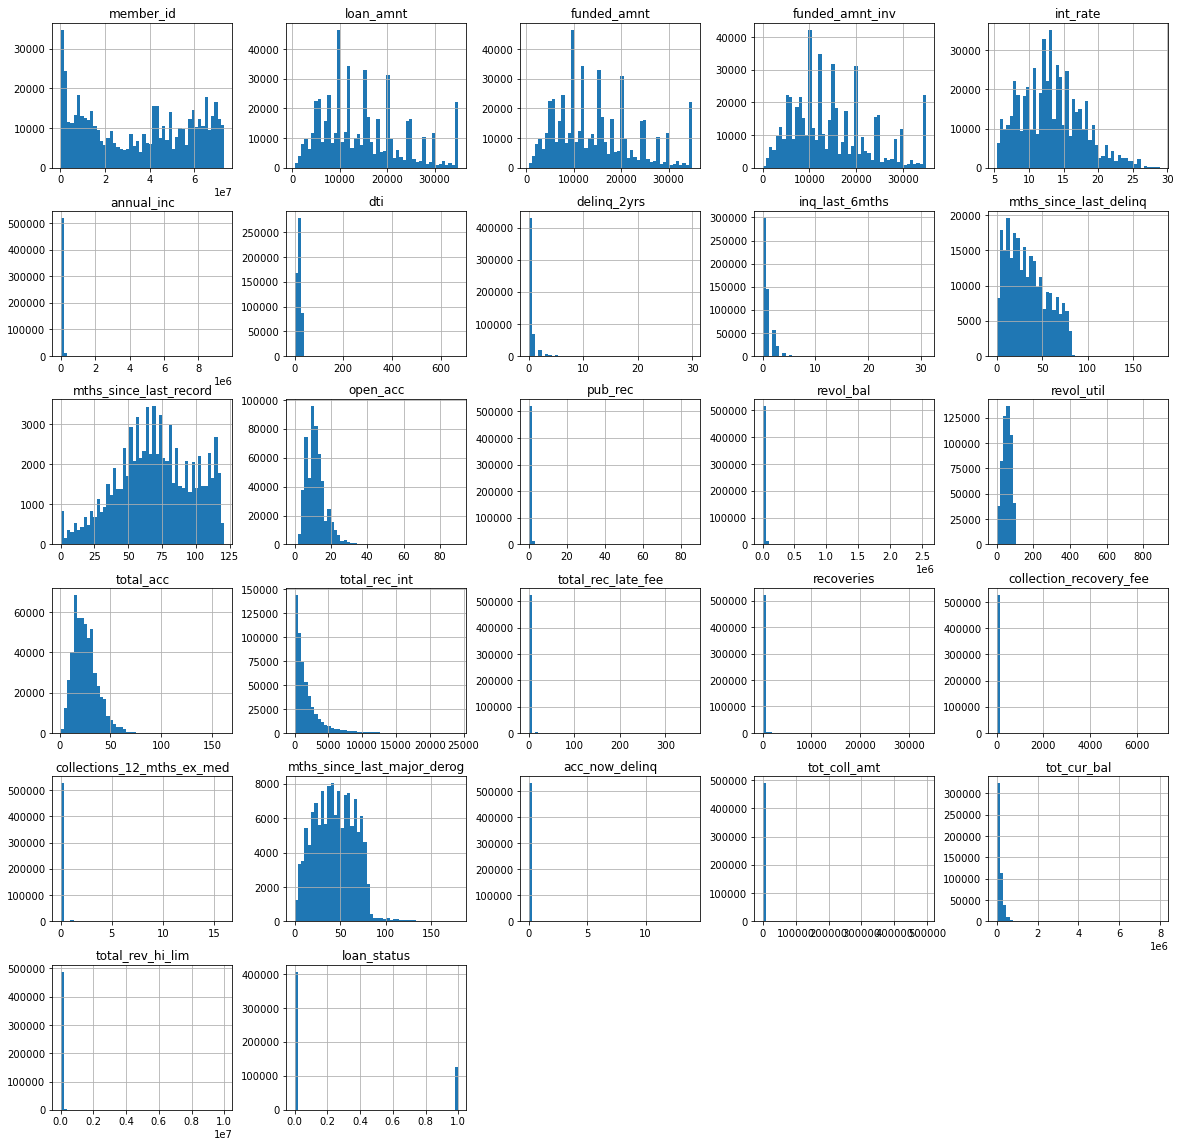

In [7]:
df.hist(bins=50, figsize=(20,20))
plt.show()

In [8]:
corr_matrix = df.corr()
corr_matrix['loan_status'].sort_values(ascending = False)

loan_status                    1.000000
inq_last_6mths                 0.087339
mths_since_last_record         0.073566
total_rec_int                  0.038344
mths_since_last_delinq         0.029236
tot_cur_bal                    0.014579
int_rate                       0.002590
total_acc                     -0.002631
total_rec_late_fee            -0.004353
annual_inc                    -0.008596
mths_since_last_major_derog   -0.010214
tot_coll_amt                  -0.013165
acc_now_delinq                -0.014415
total_rev_hi_lim              -0.019547
collections_12_mths_ex_med    -0.033922
revol_bal                     -0.040051
collection_recovery_fee       -0.042823
delinq_2yrs                   -0.045717
revol_util                    -0.047196
pub_rec                       -0.048884
recoveries                    -0.062084
open_acc                      -0.065048
loan_amnt                     -0.095713
funded_amnt                   -0.097563
funded_amnt_inv               -0.101877


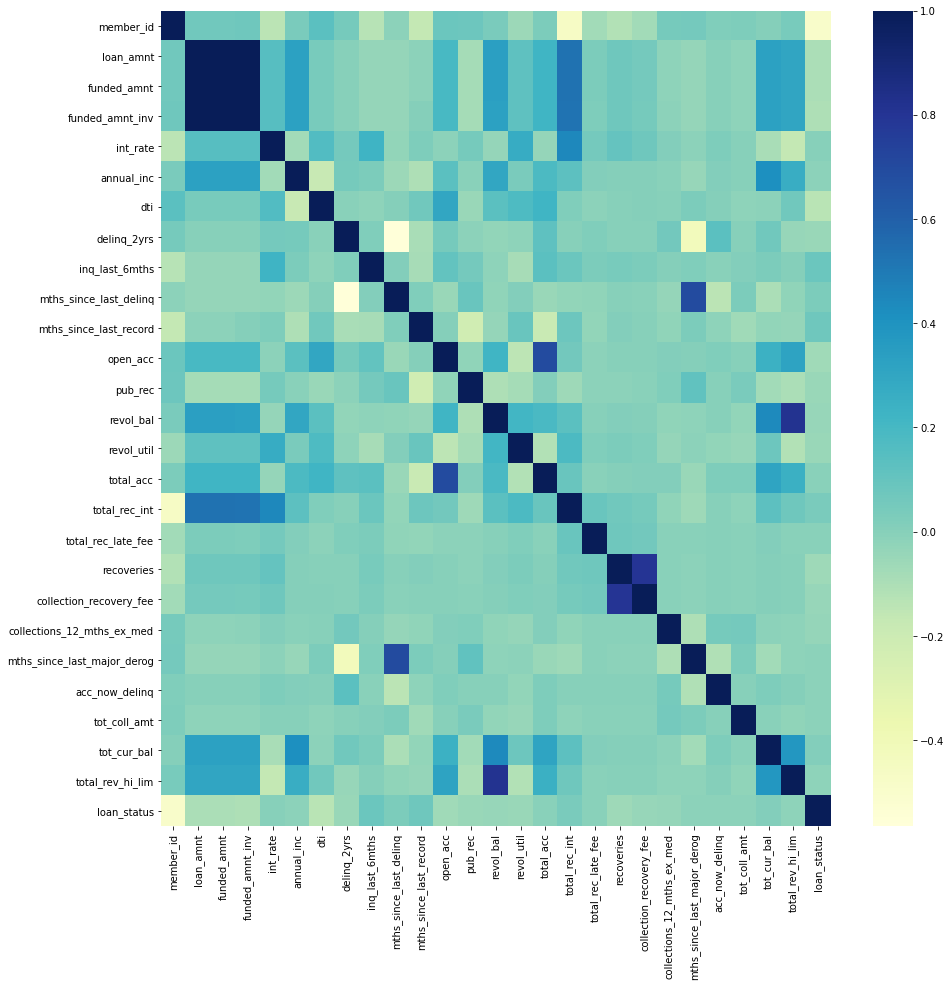

In [9]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [11]:
print(df.columns)

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [13]:
df_num = df.drop(['member_id', 'funded_amnt', 'funded_amnt_inv', 'term', 'batch_enrolled', 
                  'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership','verification_status','pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
                  'addr_state', 'initial_list_status', 'application_type', 'verification_status_joint', 'last_week_pay', 'loan_status'], axis = 1)

In [14]:
print(df_num.columns)
df_num_columns = df_num.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


In [15]:
df_num.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,14350,19.19,28700.0,33.88,0.0,1.0,50.0,75.0,14.0,1.0,...,1173.84,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0,30800.0
1,4800,10.99,65000.0,3.64,0.0,1.0,NaN,NaN,6.0,0.0,...,83.95,0.0,0.0,0.0,0.0,NaN,0.0,0.0,9974.0,32900.0
2,10000,7.26,45000.0,18.42,0.0,0.0,NaN,NaN,5.0,0.0,...,56.47,0.0,0.0,0.0,0.0,NaN,0.0,65.0,38295.0,34900.0
3,15000,19.72,105000.0,14.97,0.0,2.0,46.0,NaN,10.0,0.0,...,4858.62,0.0,0.0,0.0,0.0,NaN,0.0,0.0,55564.0,24700.0
4,16000,10.64,52000.0,20.16,0.0,0.0,NaN,NaN,11.0,0.0,...,2296.41,0.0,0.0,0.0,0.0,NaN,0.0,0.0,47159.0,47033.0


In [16]:
df_num = imputer.fit_transform(df_num)

In [17]:
print(df_num[0])

[1.43500e+04 1.91900e+01 2.87000e+04 3.38800e+01 0.00000e+00 1.00000e+00
 5.00000e+01 7.50000e+01 1.40000e+01 1.00000e+00 2.25150e+04 7.31000e+01
 2.80000e+01 1.17384e+03 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 7.40000e+01 0.00000e+00 0.00000e+00 2.86990e+04 3.08000e+04]


In [18]:
df_num = pd.DataFrame(data = df_num, columns= df_num_columns)

In [19]:
df_num.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,14350.0,19.19,28700.0,33.88,0.0,1.0,50.0,75.0,14.0,1.0,...,1173.84,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0,30800.0
1,4800.0,10.99,65000.0,3.64,0.0,1.0,31.0,70.0,6.0,0.0,...,83.95,0.0,0.0,0.0,0.0,44.0,0.0,0.0,9974.0,32900.0
2,10000.0,7.26,45000.0,18.42,0.0,0.0,31.0,70.0,5.0,0.0,...,56.47,0.0,0.0,0.0,0.0,44.0,0.0,65.0,38295.0,34900.0
3,15000.0,19.72,105000.0,14.97,0.0,2.0,46.0,70.0,10.0,0.0,...,4858.62,0.0,0.0,0.0,0.0,44.0,0.0,0.0,55564.0,24700.0
4,16000.0,10.64,52000.0,20.16,0.0,0.0,31.0,70.0,11.0,0.0,...,2296.41,0.0,0.0,0.0,0.0,44.0,0.0,0.0,47159.0,47033.0


In [20]:
df_cat = df[[ 'grade', 'sub_grade', 'emp_length', 'home_ownership','verification_status','pymnt_plan', 'purpose', 'title', 
                  'addr_state', 'initial_list_status', 'application_type']]

In [21]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [22]:
df_cat_columns = df_cat.columns

In [23]:
import missingno as msno

<AxesSubplot:>

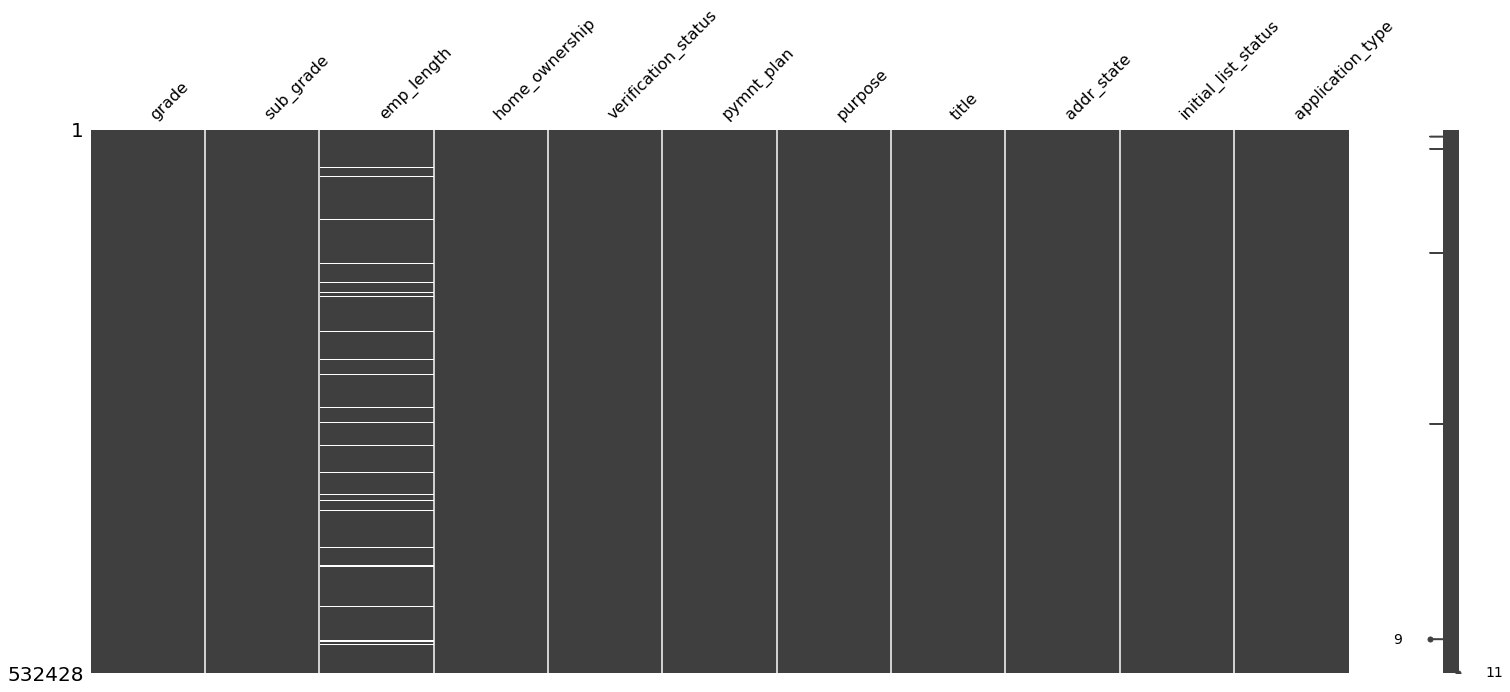

In [24]:
msno.matrix(df_cat)

In [25]:
print(df_cat.isnull().sum())
print(df_cat.shape)

grade                      0
sub_grade                  0
emp_length             26891
home_ownership             0
verification_status        0
pymnt_plan                 0
purpose                    0
title                     90
addr_state                 0
initial_list_status        0
application_type           0
dtype: int64
(532428, 11)


In [26]:
df_cat['emp_length'] = df_cat['emp_length'].fillna('U')
df_cat['title'] = df_cat['title'].fillna('V')

<ipython-input-26-d324ce610e1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['emp_length'] = df_cat['emp_length'].fillna('U')
<ipython-input-26-d324ce610e1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['title'] = df_cat['title'].fillna('V')


In [27]:
print(df_cat.isnull().sum())
print(df_cat.shape)

grade                  0
sub_grade              0
emp_length             0
home_ownership         0
verification_status    0
pymnt_plan             0
purpose                0
title                  0
addr_state             0
initial_list_status    0
application_type       0
dtype: int64
(532428, 11)


<Figure size 720x720 with 0 Axes>

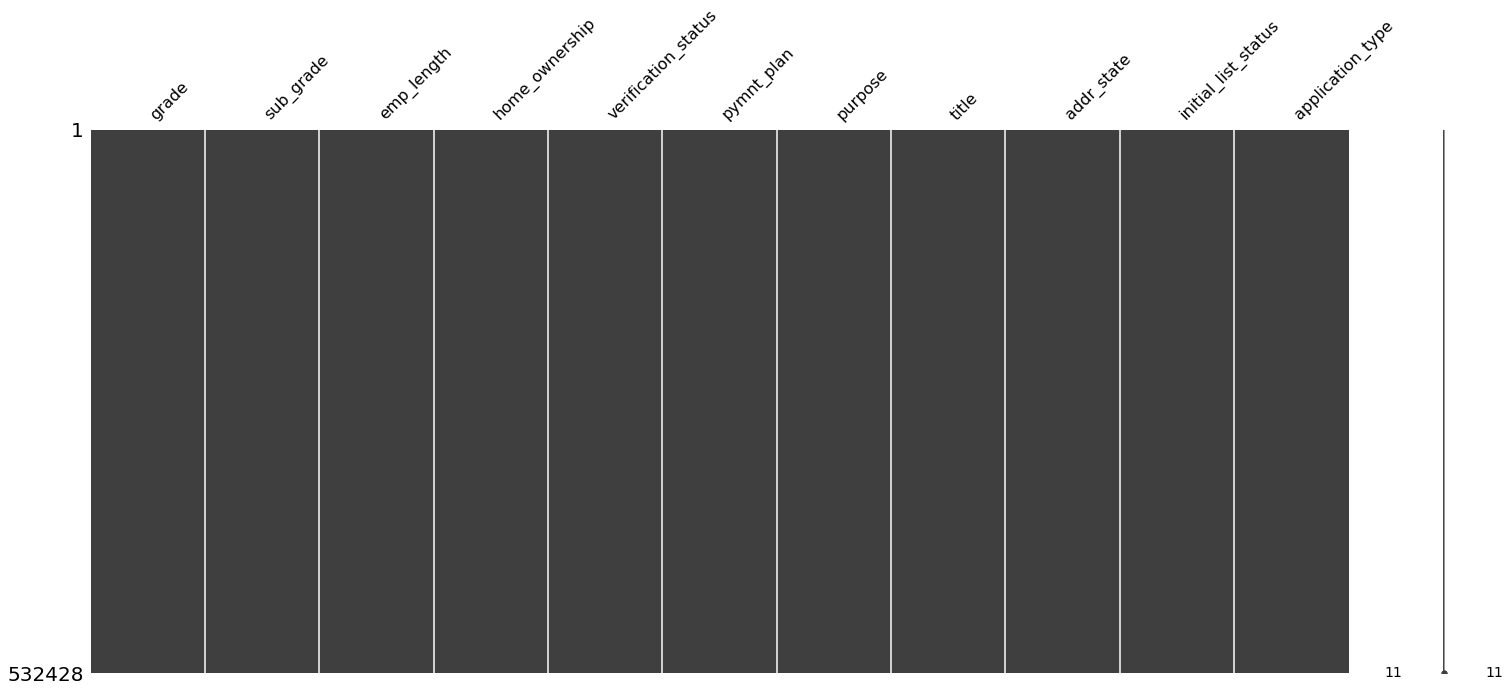

In [28]:
fig = plt.figure(figsize=(10,10))
msno.matrix(df_cat)
plt.show()

In [29]:
print(df_cat.value_counts())
print(df_cat['grade'].value_counts())
print(df_cat['sub_grade'].value_counts())
print(df_cat['emp_length'].value_counts())
print(df_cat['home_ownership'].value_counts()) 
print(df_cat['verification_status'].value_counts())
print(df_cat['pymnt_plan'].value_counts())
print(df_cat['purpose'].value_counts())
print(df_cat['title'].value_counts())
print(df_cat['addr_state'].value_counts())
print(df_cat['initial_list_status'].value_counts())
print(df_cat['application_type'].value_counts())

grade  sub_grade  emp_length  home_ownership  verification_status  pymnt_plan  purpose             title                           addr_state  initial_list_status  application_type
C      C1         10+ years   RENT            Source Verified      n           debt_consolidation  Debt consolidation              CA          w                    INDIVIDUAL          108
       C2         10+ years   RENT            Source Verified      n           debt_consolidation  Debt consolidation              CA          w                    INDIVIDUAL          100
       C3         10+ years   RENT            Source Verified      n           debt_consolidation  Debt consolidation              CA          w                    INDIVIDUAL           99
A      A5         10+ years   MORTGAGE        Source Verified      n           debt_consolidation  Debt consolidation              CA          w                    INDIVIDUAL           98
C      C4         10+ years   RENT            Source Verified      

In [30]:
df_cat.columns

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'title', 'addr_state',
       'initial_list_status', 'application_type'],
      dtype='object')

In [31]:
df_cat_new = df_cat.drop(['title', 'pymnt_plan', 'sub_grade', 'addr_state'], axis=1)

In [32]:
df_cat_1hot = cat_encoder.fit_transform(df_cat_new)
df_cat_1hot

<532428x46 sparse matrix of type '<class 'numpy.float64'>'
	with 3726996 stored elements in Compressed Sparse Row format>

In [33]:
df_cat_1hot = df_cat_1hot.toarray()

In [34]:
df_cat_1hot.shape

(532428, 46)

In [35]:
df_cat_1hot = pd.DataFrame(df_cat_1hot)

In [36]:
df_new = pd.concat([df_num, df_cat_1hot], axis=1)

In [37]:
df_new.shape

(532428, 69)

In [39]:
df_new.to_csv('X.csv')

In [40]:
df['loan_status'].value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

In [41]:
X = np.array(df_new)
Y = np.array(df['loan_status'])

In [42]:
print('X shape: {}'.format(X.shape))
print('Y shape:  {}'.format(Y.shape))

X shape: (532428, 69)
Y shape:  (532428,)


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
std_scl.fit(x_train)

StandardScaler()

In [45]:
x_train = std_scl.transform(x_train)
x_test = std_scl.transform(x_test)

In [46]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
#forest_clf.fit(x_train, y_train)

In [47]:
# print('parameters:')
# pprint(forest_clf.get_params())

In [48]:
#y_pred = forest_clf.predict(x_test)

In [49]:
# from sklearn.metrics import  confusion_matrix, classification_report, roc_auc_score, f1_score
# print(classification_report(y_pred, y_test))
# print(confusion_matrix(y_pred, y_test))
# print('roc auc score: {}'.format(roc_auc_score(y_pred,y_test)))
# print('f1 score: {}'.format(f1_score(y_pred,y_test)))

In [50]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=0, random_state=42)# Fit the random search model
rf_random.fit(x_train, y_train)